![img](lter_penguins.png)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [1]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#Set Seed = 1 for eproducibility

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
print(penguins_df.head())

#preprocessing

# step1: converting categorical data to numerical using get_dummy
penguins_df = pd.get_dummies(penguins_df,"sex",drop_first=False)
# step2: Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(penguins_df)

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0              39.1             18.7              181.0       3750.0    MALE
1              39.5             17.4              186.0       3800.0  FEMALE
2              40.3             18.0              195.0       3250.0  FEMALE
3              36.7             19.3              193.0       3450.0  FEMALE
4              39.3             20.6              190.0       3650.0    MALE


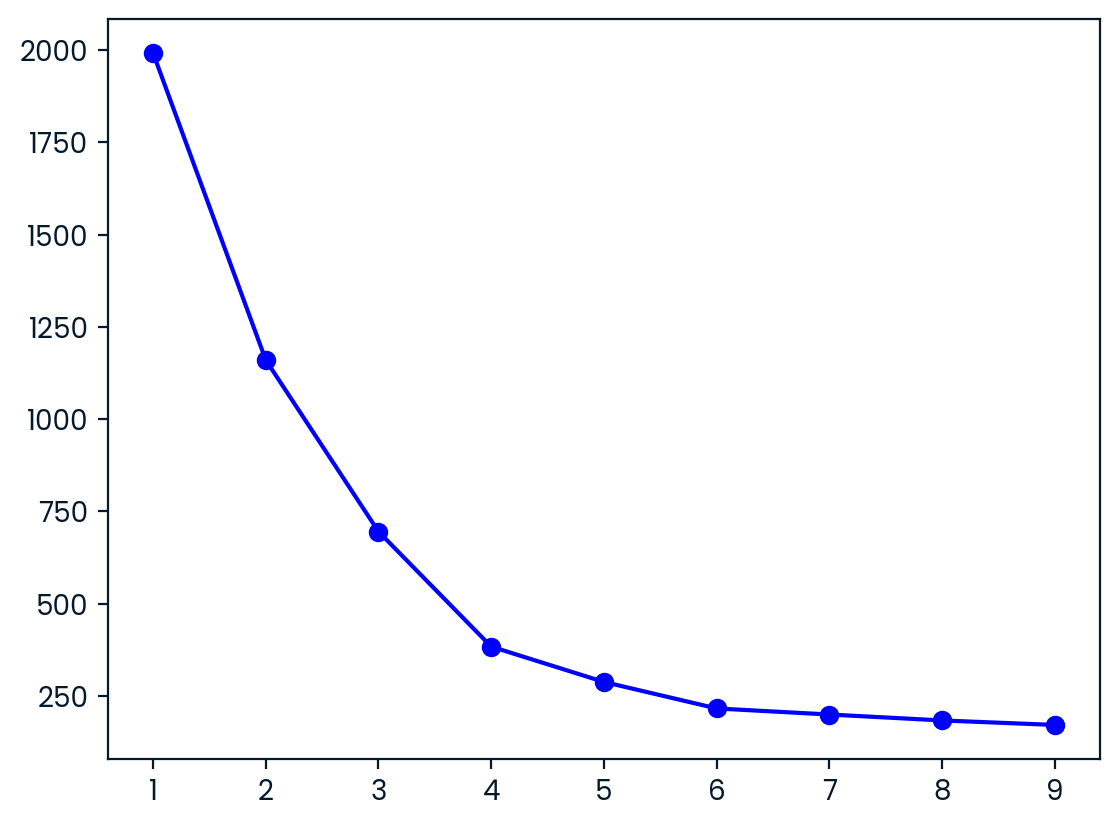

In [2]:
#Elbow Analysis to detect the optimal number of clusers

# {n_clust:inertia} dict:
n_cluster_inertia = dict()
#Calculating the inertia of every n_cluster:
for n_of_clust in range(1,10):
    model = KMeans(n_clusters = n_of_clust, random_state = 1)
    #Remember: in clustering, no need for y because we do not yet know what they are
    model.fit(X_scaled)
    n_cluster_inertia[n_of_clust] = model.inertia_

plt.plot(n_cluster_inertia.keys(), n_cluster_inertia.values(), marker='o', color='blue')
plt.show()

#Based on the elbow method, the curve flattens at k=3.
#This also makes sense because there are three known penguin species (Adelie, Chinstrap, Gentoo)
#Concluding that the optimal number of clusters for k-means clustering is 3

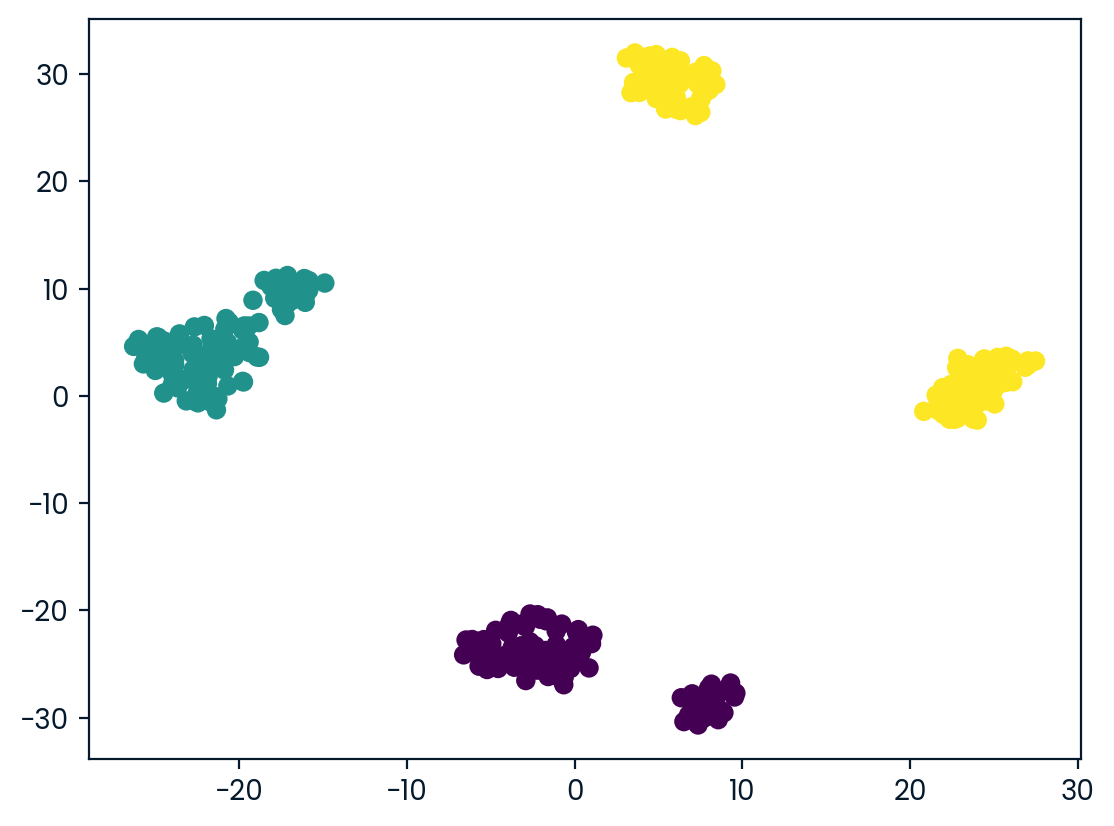

In [3]:
#Runing the algorithm:

best_model = KMeans(n_clusters = 3, random_state = 1)
best_model.fit(X_scaled)
species = best_model.predict(X_scaled)

#Visualisation:

# Because our data is >2D (>2 features) we can't visualize it directly, so to to solve this problem
# I will use t-SNE to map our data to 2D.
from sklearn.manifold import TSNE
model = TSNE(learning_rate = 100, random_state = 1)
transformed = model.fit_transform(X_scaled)
x_2d = transformed[:,0]
y_2d = transformed[:,1]

plt.scatter(x_2d, y_2d, c=species)
plt.show()

# As indicated in the graph The data forms three clear clusters.

In [4]:
# Creating a final statistical DataFrame to send our results:
penguins_df["species"] = species
stat_penguins = penguins_df.groupby("species").mean().reset_index()
stat_penguins

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,0,43.878302,19.111321,194.764151,4006.603774,0.000000,1.000000
1,1,40.217757,17.611215,189.046729,3419.158879,1.000000,0.000000
2,2,47.568067,14.996639,217.235294,5092.436975,0.487395,0.512605
